In [ ]:
!pip3 install utils

### Imports 

In [ ]:
import numpy as np
import keras 
import pandas as pd
import seaborn as sns
import missingno as msno

In [ ]:
!ls

breast.csv  data	GAN_imputation_toolkit.ipynb  letter.csv
cancer.csv  GAIN.ipynb	heart.csv		      spam.csv


## Exploring the Current datasets

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd 'gdrive/My Drive/523'

[Errno 2] No such file or directory: 'gdrive/My Drive/523'
/content/gdrive/My Drive/523


In [ ]:
heart_data = pd.read_csv('heart.csv')

In [ ]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Introducing missing data in the dataset 

### Missing data in the entire dataframe 

In [ ]:
def binary_sampler(p, rows, cols):
  '''Sample binary random variables.
  
  Args:
    - p: probability of 1
    - rows: the number of rows
    - cols: the number of columns
    
  Returns:
    - binary_random_matrix: generated binary random matrix.
  '''
  unif_random_matrix = np.random.uniform(0., 1., size = [rows, cols])
  binary_random_matrix = 1*(unif_random_matrix < p)
  return binary_random_matrix

def data_loader (data_name, miss_rate):
  
  # Load data
  if data_name in ['letter', 'spam','heart']:
    file_name = data_name+'.csv'
    data_x = np.loadtxt(file_name, delimiter=",", skiprows=1)
 
  # Parameters
  no, dim = data_x.shape
  
  # Introduce missing data
  data_m = binary_sampler(1-miss_rate, no, dim)
  miss_data_x = data_x.copy()
  miss_data_x[data_m == 0] = np.nan
      
  return data_x, miss_data_x, data_m

In [ ]:
data_x_heart, miss_data_x_heart, data_m_heart = data_loader("heart", 0.01)

In [ ]:
np.savetxt("heart_mod.csv", data_x_heart, delimiter=",")

In [ ]:
miss_data_x_heart

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

## Experiments on small complete dataset after introducing missing values

## Visualising data after introducing missing Values

In [ ]:
 df_missing_heart = pd.DataFrame(data=miss_data_x,  columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

In [ ]:
df_missing.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


Using this matrix you can very quickly find the pattern of missingness in the dataset

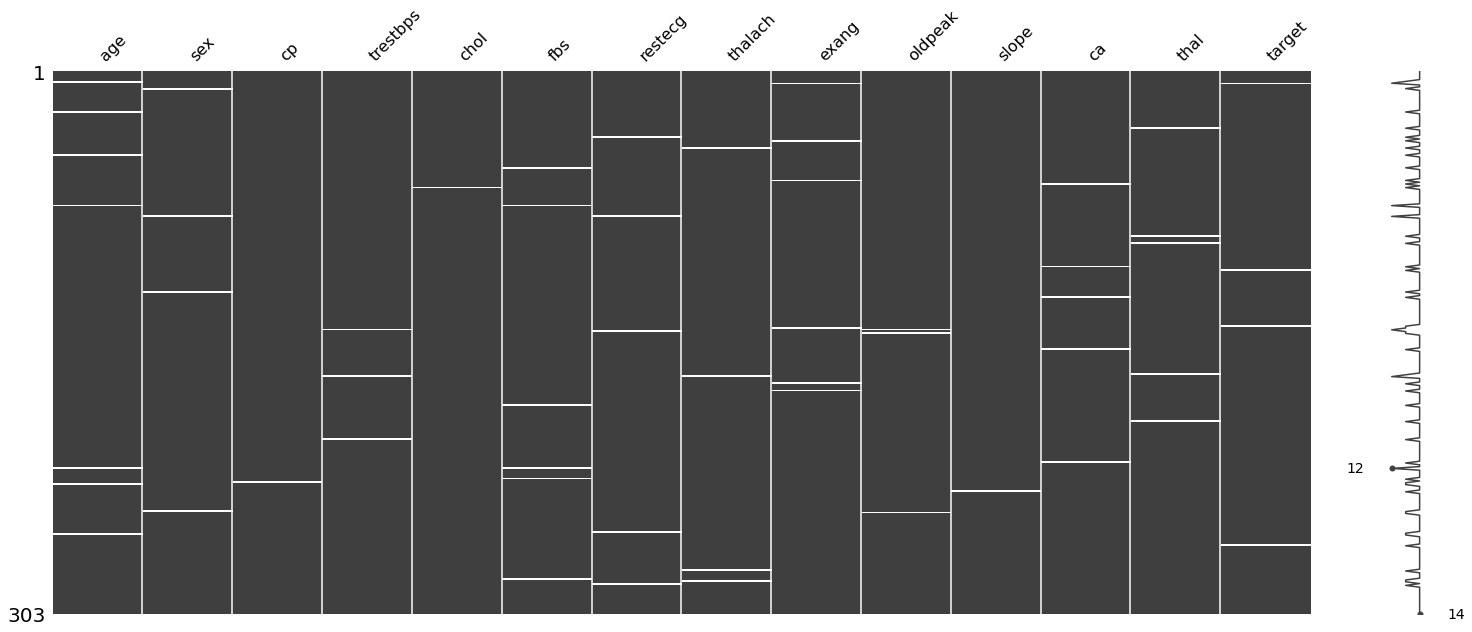

In [ ]:
msno.matrix(df_missing) 

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt

<BarContainer object of 14 artists>

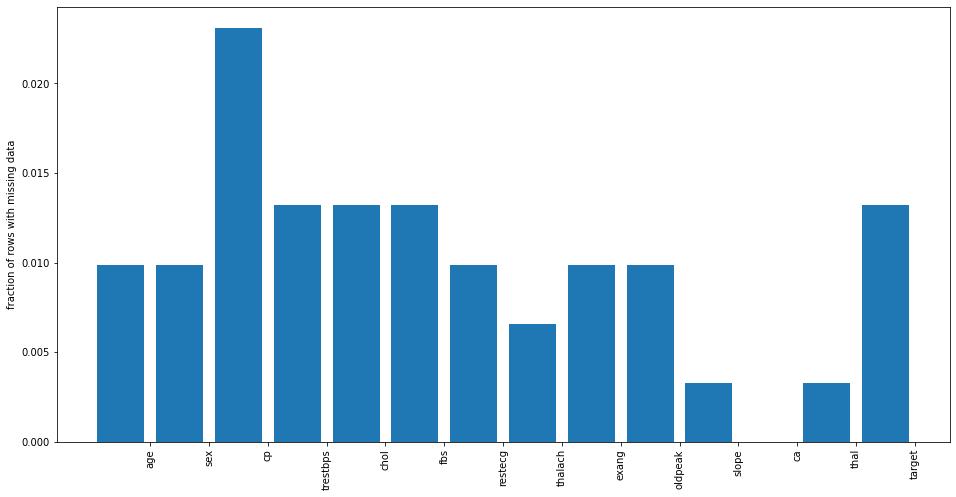

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt
null_counts = df_missing.isnull().sum()/len(df_missing)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [ ]:
df_missing.isnull().sum()

age         3
sex         3
cp          7
trestbps    4
chol        4
fbs         4
restecg     3
thalach     2
exang       3
oldpeak     3
slope       1
ca          0
thal        1
target      4
dtype: int64

In [ ]:
df_missing.shape

(303, 14)

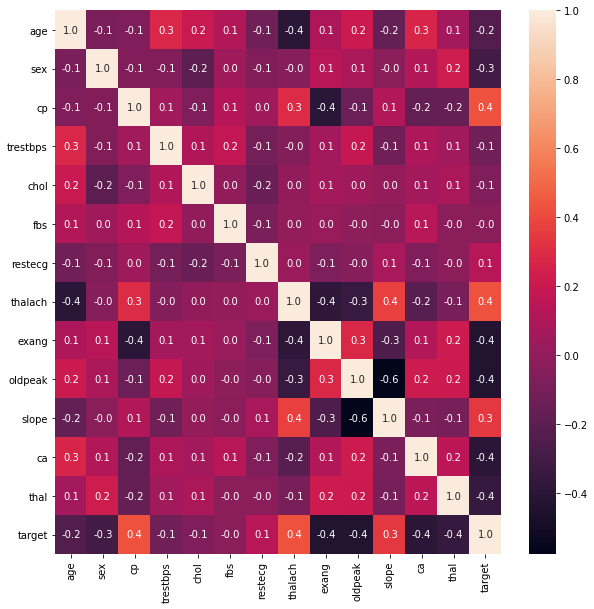

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_missing.corr(),annot=True,fmt='.1f')
plt.show()

## Imputing Values using statistical methods 



1.   Expectation Maximization
2.  Mean Imputation
3.  Mode Imputation
4.  Median Imputation
5.  Random Imputation



In [ ]:
class MisGAN(Imputation):
    def __init__(self, args):
        super(MisGAN, self).__init__()
        self.args = args

    def preprocess(self, *args, **kwargs):
        data = []
        fpaths = []

        # single preprocessing
        if self.args.input:
            fpaths.append(self.args.input)
            dt, _ = super(MisGAN, self).preprocess(self.args.input, self.args, **kwargs)
            data.append([(dt, "", None)])
        else:
            for file in tqdm(os.listdir(join(os.pardir, "data"))):
                fpath = join(os.pardir, "data", file)
                if isfile(fpath):
                    fpaths.append(file)
                    data.append(super(MisGAN, self).preprocess(fpath, self.args, **kwargs))
        return preprocess.preprocess(self.args, data, fpaths)

In [ ]:
class Args():
    def __init__(self):
        self.fname = False
        self.model = False
        self.ratio = False
        self.split = False
        self.ims = False
        self.input = False


args = Args()
misgan = MisGAN(args)

In [ ]:
isgan.args.split=0.8
misgan.preprocess()

for f in os.listdir('data'):
    print(f)

In [ ]:
misgan.args.fname = "wdbc.csv_train"

if os.path.exists("checkpoint/wdbc.csv_train_data_critic.pth"):
    print(f)
else:
    misgan.train()
    
for f in os.listdir('checkpoint'):
    print(f)

In [ ]:
misgan.args.fname = "data/wdbc.csv"
misgan.args.model = "wdbc.csv_train"
misgan.impute()

for f in os.listdir('result'):
    print(f)

In [ ]:
misgan.args.fname = "data/wdbc.csv"
misgan.args.model = "wdbc.csv_train"
rmse = misgan.evaluate()
print("RMSE = {0}".format(rmse))